In [1]:
import math
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [2]:
dataset = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW3/iris.data.csv', na_values = '?', names = ['sepal length', 'sepal width', 'petal length', 'petal width','class'] )

In [3]:
df = dataset
df = df.replace('?',np.NaN)
df = df.dropna()
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [4]:
from sklearn.preprocessing import LabelEncoder
df_le = df
labelencoder = LabelEncoder()
df_le['class'] = labelencoder.fit_transform(df_le['class'])
df_le

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X = df_le.drop(['class'], axis=1) #刪除欄位
Y = df_le['class'] 

In [6]:
from datetime import datetime
start = datetime.now()

#DBSCAN模型
clustering=DBSCAN(eps=0.5,min_samples=9).fit(df_le)

end = datetime.now()
time = end - start

#clustering
print("分群時間：", time)

分群時間： 0:00:00.003989


In [7]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  2,  2, -1, -1, -1,  2, -1, -1, -1,  2,  2, -1, -1,
       -1,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1, -1],
      dtype=int64)

In [8]:
n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


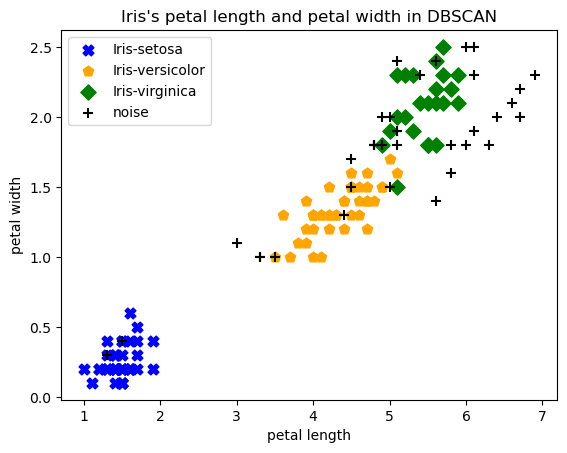

In [9]:
#花瓣分群
C0 = df[clustering.labels_ == 0]
C1 = df[clustering.labels_ == 1]
C2 = df[clustering.labels_ == 2]
C = df[clustering.labels_ == -1]
plt.scatter(C0['petal length'],C0['petal width'],marker='X',c="blue",s=60,label = 'Iris-setosa' )
plt.scatter(C1['petal length'],C1['petal width'],marker='p',c="orange",s=60, label = 'Iris-versicolor')
plt.scatter(C2['petal length'],C2['petal width'],marker='D',c="green",s=60,label = 'Iris-virginica')
plt.scatter(C['petal length'],C['petal width'],marker='+',c="black",s=50,label = 'noise')

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Iris\'s petal length and petal width in DBSCAN')
plt.legend()
plt.show()

In [10]:
#衡量分群品質
#purity指標
def purity_score(Y, X):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(Y, X)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(Y,clustering.labels_))

0.94


In [11]:
#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, clustering.labels_, metric='euclidean'))

Silhouette Coefficient: 0.3964927010542853
